# Simple linear regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
file = pd.read_csv('../datasets/kc_house_data.csv')[:800]
file.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
data = pd.DataFrame({'sqft_living':file['sqft_living'], 'price':file['price']})
data.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [29]:
# Changing the scale to avoid overflow
X, Y = np.array(data['sqft_living']).reshape(-1, 1), data['price']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [30]:
m, b = 0, 0

## Sum of squars
$$ Error =  \sum_{i=1}^{n} {(m*x+b) - y} $$
OR
$$ Error =  \sum_{i=1}^{n} {\hat{y} - y} $$

In [31]:
def error(X, Y, m, b):
    error = 0
    for x, y in zip(X, Y):
        x, y = float(x), float(y)
        error += (m*x+b - y)**2
    return error/len(X)

## We are using gradient descent
## Gradient
$$ \frac{\partial Error}{\partial m} = \frac{1}{n}2x(m*x+b - y) $$
OR
$$ \frac{\partial Error}{\partial m} = \frac{1}{n}2x( \hat{y} - y) $$
### AND
$$ \frac{\partial Error}{\partial b} = \frac{1}{n}2(m*x+b - y) $$
OR
$$ \frac{\partial Error}{\partial b} = \frac{1}{n}2( \hat{y} - y) $$

In [32]:
def gradient(X, Y, m, b, lr, itr):
    for _ in range(itr):
        for x, y in zip(X, Y):
            x, y = float(x), float(y)
            grad_m = x*(m*x+b-y)
            grad_b = m*x+b-y
            m -= grad_m*2/len(X)*lr
            b -= grad_b*2/len(X)*lr
    return m, b

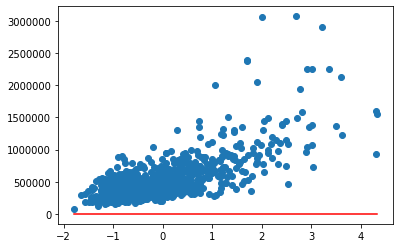

In [33]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [(m*min(X)+b), (m*max(X)+b)], color='red')

In [34]:
error(X, Y, m, b)

404614301415.8525

In [35]:
new_m, new_b = gradient(X, Y, m, b, 0.01, 10000)

In [36]:
error(X, Y, new_m, new_b)

62660326190.39418

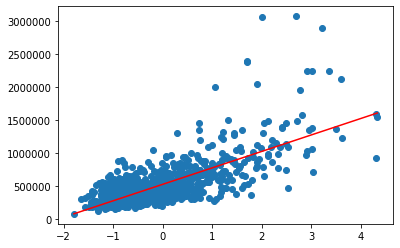

In [37]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [(new_m*min(X)+new_b), (new_m*max(X)+new_b)], color='red')